# Tabla de Contenidos

- [Introducción](#Introducción)
- [Visitas](#Visitas)
- [Pedidos](#Pedidos)
- [Marketing](#Marketing)

# Introducción

Para este proyecto buscamos optimizar los gastos de marketing, para lo cual deberemos estudiar el comportamiento de los usuarios a lo largo del tiempo, calcular la tasa de retención y el beneficio económico que obtenemos de cada comprador.
Disponemos de tres bases de datos, las cuales deberemos preparar para el posterior análisis. Cada base de datos contiene información sobre las visitas, los pedidos y los costos de marketing respectivamente.

# Preparación de datos

In [25]:
import pandas as pd
import numpy as np
import seaborn as sns
from scipy import stats as st
from matplotlib import pyplot as plt

In [26]:
visits = pd.read_csv('/Users/Christian/Documents/Portfolio/behaviour_over_time/visits_log_us.csv')

In [27]:
visits.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359400 entries, 0 to 359399
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   Device     359400 non-null  object
 1   End Ts     359400 non-null  object
 2   Source Id  359400 non-null  int64 
 3   Start Ts   359400 non-null  object
 4   Uid        359400 non-null  uint64
dtypes: int64(1), object(3), uint64(1)
memory usage: 71.1 MB


<i> Podemos observar que no existen valores nulos. </i>

In [28]:
visits.columns = visits.columns.str.lower() #Cambiamos a minúsculas todas los caracteres de los nombres de las columnas
visits.columns = visits.columns.str.replace(' ', '_')#Implementamos el formato snake_case para los nombres de las columnas

In [29]:
visits['device'].value_counts()

device
desktop    262567
touch       96833
Name: count, dtype: int64

In [30]:
visits['device'] = visits['device'].astype('category') #Podemos cambiar el tipo de datos a 'category' para optimizar los datos

In [31]:
print(visits.head()) #Imprimimos las primeras filas para revisar el formato de las columnas start_ts y end_ts

    device               end_ts  source_id             start_ts  \
0    touch  2017-12-20 17:38:00          4  2017-12-20 17:20:00   
1  desktop  2018-02-19 17:21:00          2  2018-02-19 16:53:00   
2    touch  2017-07-01 01:54:00          5  2017-07-01 01:54:00   
3  desktop  2018-05-20 11:23:00          9  2018-05-20 10:59:00   
4  desktop  2017-12-27 14:06:00          3  2017-12-27 14:06:00   

                    uid  
0  16879256277535980062  
1    104060357244891740  
2   7459035603376831527  
3  16174680259334210214  
4   9969694820036681168  


In [32]:
visits['end_ts'] = pd.to_datetime(visits['end_ts'], format="%Y-%m-%d %H:%M:%S") #Cambiamos el dtype 'object' para optimizar los datos
visits['start_ts'] = pd.to_datetime(visits['start_ts'], format="%Y-%m-%d %H:%M:%S")
print(visits.info(memory_usage='deep')) #Comprobamos el espacio que ocupa nuestro conjunto de datos después de las modificaciones

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359400 entries, 0 to 359399
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   device     359400 non-null  category      
 1   end_ts     359400 non-null  datetime64[ns]
 2   source_id  359400 non-null  int64         
 3   start_ts   359400 non-null  datetime64[ns]
 4   uid        359400 non-null  uint64        
dtypes: category(1), datetime64[ns](2), int64(1), uint64(1)
memory usage: 11.3 MB
None


In [33]:
print(visits.duplicated().sum()) #Nos aseguramos de no pasar por alto valores duplicados

0


In [34]:
orders = pd.read_csv('/Users/Christian/Documents/Portfolio/behaviour_over_time/orders_log_us.csv')
print(orders.info(memory_usage='deep'))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50415 entries, 0 to 50414
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Buy Ts   50415 non-null  object 
 1   Revenue  50415 non-null  float64
 2   Uid      50415 non-null  uint64 
dtypes: float64(1), object(1), uint64(1)
memory usage: 4.0 MB
None


<i> Nuevamente vemos que no existen valores nulos. </i>

In [35]:
orders.columns = orders.columns.str.lower()
orders.columns = orders.columns.str.replace(' ', '_')
orders['buy_ts'] = pd.to_datetime(orders['buy_ts'], format="%Y-%m-%d %H:%M:%S")
print(orders.info(memory_usage='deep'))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50415 entries, 0 to 50414
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   buy_ts   50415 non-null  datetime64[ns]
 1   revenue  50415 non-null  float64       
 2   uid      50415 non-null  uint64        
dtypes: datetime64[ns](1), float64(1), uint64(1)
memory usage: 1.2 MB
None


In [36]:
print(orders.duplicated().sum())

0


In [37]:
costs = pd.read_csv('/Users/Christian/Documents/Portfolio/behaviour_over_time/costs_us.csv')
print(costs.info(memory_usage='deep'))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2542 entries, 0 to 2541
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   source_id  2542 non-null   int64  
 1   dt         2542 non-null   object 
 2   costs      2542 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 186.3 KB
None


<i> No hay valores nulos. </i>

In [38]:
print(costs.head())

   source_id          dt  costs
0          1  2017-06-01  75.20
1          1  2017-06-02  62.25
2          1  2017-06-03  36.53
3          1  2017-06-04  55.00
4          1  2017-06-05  57.08


In [39]:
costs['dt'] = pd.to_datetime(costs['dt'])
print(costs.info(memory_usage='deep'))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2542 entries, 0 to 2541
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   source_id  2542 non-null   int64         
 1   dt         2542 non-null   datetime64[ns]
 2   costs      2542 non-null   float64       
dtypes: datetime64[ns](1), float64(1), int64(1)
memory usage: 59.7 KB
None


In [40]:
print(costs.duplicated().sum())

0


# Visitas

## Usuarios por día, semana y mes.


In [41]:
visits_df = visits.copy()
visits_df['session_year'] = visits_df['start_ts'].dt.year
visits_df['session_month'] = visits_df['start_ts'].dt.month
visits_df['session_week'] = visits_df['start_ts'].dt.weekday
visits_df['session_date'] = visits_df['start_ts'].dt.date
dau_visits = visits_df.groupby('session_date').agg({'uid':'nunique'}).mean()
wau_visits = visits_df.groupby(['session_year','session_week']).agg({'uid':'nunique'}).mean()
mau_visits = visits_df.groupby(['session_year','session_month']).agg({'uid':'nunique'}).mean()
print('El número de usuarios diarios es:', int(dau_visits))
print('El número de usuarios semanales es:',int(wau_visits))
print('El número de usuarios mensuales es:', int(mau_visits))

El número de usuarios diarios es: 907
El número de usuarios semanales es: 21554
El número de usuarios mensuales es: 23228


C:\Users\Christian\AppData\Local\Temp\ipykernel_9156\2427015273.py:9: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  print('El número de usuarios diarios es:', int(dau_visits))
C:\Users\Christian\AppData\Local\Temp\ipykernel_9156\2427015273.py:10: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  print('El número de usuarios semanales es:',int(wau_visits))
C:\Users\Christian\AppData\Local\Temp\ipykernel_9156\2427015273.py:11: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  print('El número de usuarios mensuales es:', int(mau_visits))


## Número de sesiones por día.


In [42]:
sessions_per_day = visits_df.groupby('session_date').agg({'uid':'count'}).mean()
print('El promedio de sesiones por día es de:', int(sessions_per_day))

El promedio de sesiones por día es de: 987


C:\Users\Christian\AppData\Local\Temp\ipykernel_9156\1091000832.py:2: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  print('El promedio de sesiones por día es de:', int(sessions_per_day))


## Duración promedio de cada sesión.


In [43]:
visits_df['session_length'] = visits_df['end_ts'] - visits_df['start_ts']
avg_length_seconds = visits_df['session_length'].mean().total_seconds() / 60
print('La duración promedio de las sesiones es de:', int(avg_length_seconds), 'minutos')

La duración promedio de las sesiones es de: 10 minutos


## Frecuencia con que los usuarios y las usuarias regresan.

In [52]:
# Creamos cohortes con la primer fecha de inicio de sesión y el primer mes de inicio de sesión
first_login_date = visits_df.groupby('uid')['start_ts'].min().reset_index()
first_login_date.rename(columns={'start_ts':'first_login'}, inplace=True)
print(first_login_date.head())

               uid         first_login
0   11863502262781 2018-03-01 17:27:00
1   49537067089222 2018-02-06 15:55:00
2  297729379853735 2017-06-07 18:47:00
3  313578113262317 2017-09-18 22:49:00
4  325320750514679 2017-09-30 14:29:00


In [54]:
# Combinamos nuestras tablas para poder calcular la edad de las cohortes
visits_cohorts = pd.merge(visits_df, first_login_date, on='uid')
visits_cohorts['cohort_lifetime'] = (
    (visits_cohorts['start_ts'].dt.year - visits_cohorts['first_login'].dt.year) * 12 +
    (visits_cohorts['start_ts'].dt.month - visits_cohorts['first_login'].dt.month)
)
visits_cohorts['first_month'] = visits_cohorts['first_login'].dt.strftime('%Y-%m')
visits_cohorts = (
    visits_cohorts.groupby(['first_month', 'cohort_lifetime'])
    .agg({'uid': 'nunique'})
    .reset_index())
print(visits_cohorts)

   first_month  cohort_lifetime    uid
0      2017-06                0  13259
1      2017-06                1   1043
2      2017-06                2    713
3      2017-06                3    814
4      2017-06                4    909
..         ...              ...    ...
73     2018-03                1    861
74     2018-03                2    557
75     2018-04                0  15709
76     2018-04                1    760
77     2018-05                0  15273

[78 rows x 3 columns]


In [55]:
# Calcular el número inicial de usuarios de cada cohorte nos ayudará a calcular la retención de los mismos.
initial_users_count = visits_cohorts[visits_cohorts['cohort_lifetime'] == 0][['first_month', 'uid']]
initial_users_count = initial_users_count.rename(columns={'uid':'cohort_users'})
visits_cohorts = visits_cohorts.merge(initial_users_count, on='first_month')
visits_cohorts['retention'] = visits_cohorts['uid'] / visits_cohorts['cohort_users']
print(visits_cohorts)

   first_month  cohort_lifetime    uid  cohort_users  retention
0      2017-06                0  13259         13259   1.000000
1      2017-06                1   1043         13259   0.078664
2      2017-06                2    713         13259   0.053775
3      2017-06                3    814         13259   0.061392
4      2017-06                4    909         13259   0.068557
..         ...              ...    ...           ...        ...
73     2018-03                1    861         20589   0.041818
74     2018-03                2    557         20589   0.027053
75     2018-04                0  15709         15709   1.000000
76     2018-04                1    760         15709   0.048380
77     2018-05                0  15273         15273   1.000000

[78 rows x 5 columns]


In [ ]:
# Creamos una tabla con pivot_table para poder presentar nuestros resultados.
visits_retention = visits_cohorts.pivot_table(
    index="first_month",
    columns="cohort_lifetime",
    values="retention",
    aggfunc="sum"
)

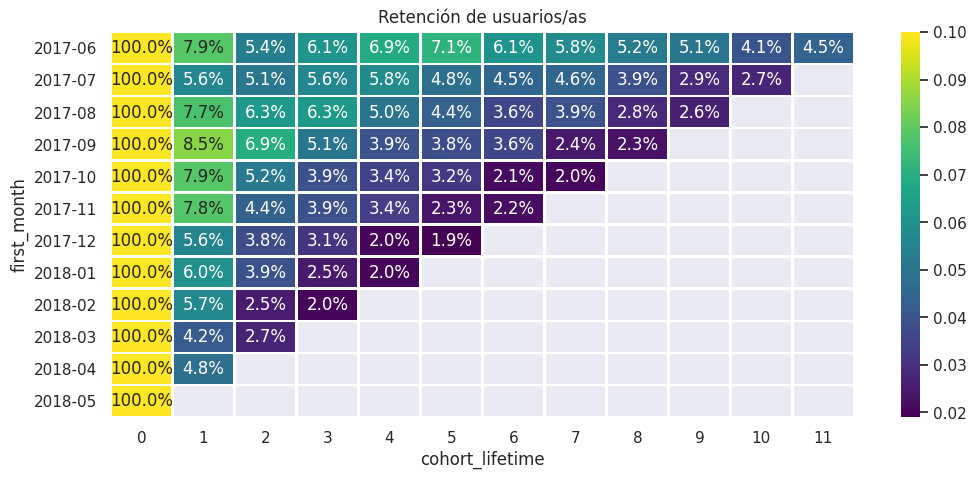

In [ ]:
# Un mapa de calor nos da una mejor idea de las cifras.
sns.set(style='darkgrid')
plt.figure(figsize=(12, 5))
plt.title('Retención de usuarios/as')
sns.heatmap(visits_retention, annot=True, fmt='.1%', linewidths=1, linecolor='white', vmax=.10, cmap='viridis')
plt.show()

Observamos que para casi todas las cohortes existe un descenso en la tasa de retención a partir de la segunda semana. El caso de la cohorte de junio de 2017 es peculiar, ya que registra un repunte para las semanas 3, 4 y 5, y después vuelve a disminuir. Esto significa que el comportamiento de los usuarios y usuarias cambia con cada nueva cohorte. Puede que se hayan escogido mal las fuentes de tráfico o que exista un problema con el sitio web. Podríamos realizar un análisis de embudo con los datos de actividad de los usuarios para determinar en qué punto de la navegación los usuarios están experimentando mayores problemas y quizás esto nos ayude a determinar qué debemos mejorar en nuestro sitio para aumentar la conversión y la retención.

# Pedidos


##  ¿Cuándo la gente empieza a comprar?


In [ ]:
orders_df = orders.copy()
orders_df['order_month'] = orders_df['buy_ts'].astype('datetime64[M]')
orders_df['order_week'] = orders_df['buy_ts'].astype('datetime64[W]')
orders_df['order_day'] = orders_df['buy_ts'].astype('datetime64[D]')

In [ ]:
first_order_date = orders_df.groupby('uid')[['buy_ts','order_month']].min().reset_index()
first_order_date.rename(columns={'buy_ts':'first_order_date', 'order_month':'first_order_month'}, inplace=True)
print(first_order_date.head())

                uid    first_order_date first_order_month
0   313578113262317 2018-01-03 21:51:00        2018-01-01
1  1575281904278712 2017-06-03 10:13:00        2017-06-01
2  2429014661409475 2017-10-11 18:33:00        2017-10-01
3  2464366381792757 2018-01-28 15:54:00        2018-01-01
4  2551852515556206 2017-11-24 10:14:00        2017-11-01


In [ ]:
first_login_month = visits_df.groupby(['uid','source_id'])[['start_ts','session_month']].min().reset_index()
first_login_month.rename(columns={'start_ts':'first_login','session_month':'first_month'},inplace=True)
print(first_login_month.head())

               uid  source_id         first_login first_month
0   11863502262781          3 2018-03-01 17:27:00  2018-03-01
1   49537067089222          2 2018-02-06 15:55:00  2018-02-01
2  297729379853735          3 2017-06-07 18:47:00  2017-06-01
3  313578113262317          2 2017-09-18 22:49:00  2017-09-01
4  325320750514679          5 2017-09-30 14:29:00  2017-09-01


In [ ]:
conversion_rate = pd.merge(
    first_order_date[["uid", "first_order_date", "first_order_month"]],
    first_login_month,on='uid')
print(conversion_rate.head())

                uid    first_order_date first_order_month  source_id  \
0   313578113262317 2018-01-03 21:51:00        2018-01-01          2   
1  1575281904278712 2017-06-03 10:13:00        2017-06-01         10   
2  2429014661409475 2017-10-11 18:33:00        2017-10-01          3   
3  2464366381792757 2018-01-28 15:54:00        2018-01-01          5   
4  2551852515556206 2017-11-24 10:14:00        2017-11-01          5   

          first_login first_month  
0 2017-09-18 22:49:00  2017-09-01  
1 2017-06-03 10:13:00  2017-06-01  
2 2017-10-11 17:14:00  2017-10-01  
3 2018-01-27 20:10:00  2018-01-01  
4 2017-11-24 10:14:00  2017-11-01  


In [ ]:
conversion_rate['time_to_order'] = conversion_rate['first_order_date'] - conversion_rate['first_login']
conversion_rate['time_to_order'] /= np.timedelta64(1,'D')

In [ ]:
buyers = len(conversion_rate)
print(f"""
Conversion 0 días: {round((sum(conversion_rate['time_to_order'] < 1) / buyers)*100,2)}%
Conversion 1 semana: {round((sum(conversion_rate['time_to_order'] <= 7) / buyers)*100,2)}%
Conversion 1 mes: {round((sum(conversion_rate['time_to_order'] <= 30) / buyers)*100,2)}%
Conversion 1 año: {round((sum(conversion_rate['time_to_order'] <= 365) / buyers)*100,2)}%""")


Conversion 0 días: 76.39%
Conversion 1 semana: 83.1%
Conversion 1 mes: 88.61%
Conversion 1 año: 100.0%


##  ¿Cuántos pedidos hacen durante un período de tiempo dado?


In [ ]:
count_ord_d = orders_df.groupby('order_day')['uid'].count().reset_index()
count_ord_w = orders_df.groupby('order_week')['uid'].count().reset_index()
count_ord_m = orders_df.groupby('order_month')['uid'].count().reset_index()

print(f"""
El número promedio de pedidos por día es de {round(count_ord_d['uid'].mean(),2)}
El número promedio de pedidos por semana es de {round(count_ord_w['uid'].mean(),2)}
El número promedio de pedidos por mes es de {round(count_ord_m['uid'].mean(),2)}
""")


El número promedio de pedidos por día es de 138.5
El número promedio de pedidos por semana es de 951.23
El número promedio de pedidos por mes es de 3878.08



##  ¿Cuál es el tamaño promedio de compra?

In [ ]:
rev_per_d = orders_df.groupby('order_day').agg({'revenue':'sum'}).reset_index()
rev_per_w = orders_df.groupby('order_week').agg({'revenue':'sum'}).reset_index()
rev_per_m = orders_df.groupby('order_month').agg({'revenue':'sum'}).reset_index()

print(f"""
El tamaño promedio de compra diaria es de {round(rev_per_d['revenue'].mean(),2)} dólares
El tamaño promedio de compra semanal es de {round(rev_per_w['revenue'].mean(),2)} dólares
El tamaño promedio de compra mensual es de {round(rev_per_m['revenue'].mean(),2)} dólares
""")


El tamaño promedio de compra diaria es de 692.46 dólares
El tamaño promedio de compra semanal es de 4755.8 dólares
El tamaño promedio de compra mensual es de 19389.02 dólares



##  ¿Cuánto dinero trae cada usuario? (LTV)

In [ ]:
#Calculamos el número de clientes nuevos por mes
ord_sizes = first_order_date.groupby('first_order_month').agg({'uid':'nunique'}).reset_index()
ord_sizes.columns = ['first_order_month', 'new_buyers']
print(ord_sizes.head())

  first_order_month  new_buyers
0        2017-06-01        2023
1        2017-07-01        1923
2        2017-08-01        1370
3        2017-09-01        2581
4        2017-10-01        4340


In [ ]:
#Creamos cohortes agregando el primer mes de compra a nuestra tabla de pedidos.
orders_new_b = pd.merge(orders_df[['uid','order_month','revenue']], first_order_date, on='uid')
#Agrupamos por mes de compra y mes de primera compra, totalizando los ingresos.
order_cohorts = orders_new_b.groupby(['first_order_month','order_month']).agg({'revenue':'sum'}).reset_index()
print(order_cohorts.head())

  first_order_month order_month  revenue
0        2017-06-01  2017-06-01  9557.49
1        2017-06-01  2017-07-01   981.82
2        2017-06-01  2017-08-01   885.34
3        2017-06-01  2017-09-01  1931.30
4        2017-06-01  2017-10-01  2068.58


In [ ]:
#Agregamos datos sobre cuántos usuarios realizaron sus primeras compras en cada mes.
orders_per_month = pd.merge(ord_sizes, order_cohorts, on='first_order_month')
print(orders_per_month.head())

  first_order_month  new_buyers order_month  revenue
0        2017-06-01        2023  2017-06-01  9557.49
1        2017-06-01        2023  2017-07-01   981.82
2        2017-06-01        2023  2017-08-01   885.34
3        2017-06-01        2023  2017-09-01  1931.30
4        2017-06-01        2023  2017-10-01  2068.58


In [ ]:
#Calculamos la edad de cada cohorte.
orders_per_month['age'] = orders_per_month['order_month'] - orders_per_month['first_order_month']
orders_per_month['age'] = (orders_per_month['age'] /np.timedelta64(1,'M')).round().astype(int)
#Calculamos el beneficio por cohorte (LTV)
orders_per_month['ltv'] = orders_per_month['revenue'] / orders_per_month['new_buyers'] 
orders_per_month['first_order_month'] = orders_per_month['first_order_month'].dt.strftime('%Y-%m')
print(orders_per_month.head())

  first_order_month  new_buyers order_month  revenue  age       ltv
0           2017-06        2023  2017-06-01  9557.49    0  4.724414
1           2017-06        2023  2017-07-01   981.82    1  0.485329
2           2017-06        2023  2017-08-01   885.34    2  0.437637
3           2017-06        2023  2017-09-01  1931.30    3  0.954671
4           2017-06        2023  2017-10-01  2068.58    4  1.022531


In [ ]:
#Creamos una tabla dinámica
orders_ltv = orders_per_month.pivot_table(
    index='first_order_month', columns='age', values='ltv', aggfunc='mean'
).cumsum(axis=1).round(2)

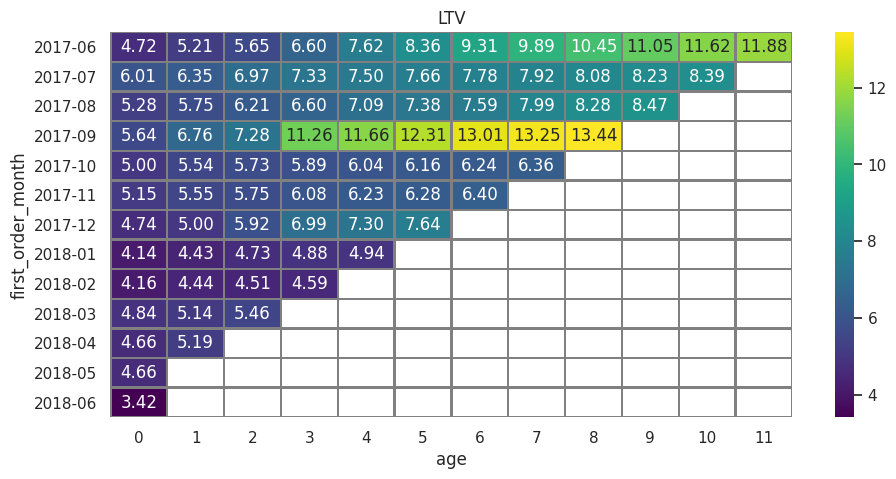

In [ ]:
sns.set(style='white')
plt.figure(figsize=(11, 5))
plt.title('LTV')
sns.heatmap(
    orders_ltv, annot=True, fmt='.2f', linewidths=1, linecolor='gray', cmap='viridis'
)
plt.show()

En general, el LTV de todas las cohortes aumenta pero no al mismo ritmo. Por ejemplo, la cohorte de septiembre de 2017 incrementó sustancialmente su LTV promedio a partir del 4° mes, mientras que las cohortes de junio, julio y agosto de ese mismo año se mantuvieron con una tasa de crecimiento mucho menor. ¿A qué podría deberse el aumento tan marcado en dicha cohorte? ¿Por qué únicamente esa cohorte se vió afectada durante esos meses?

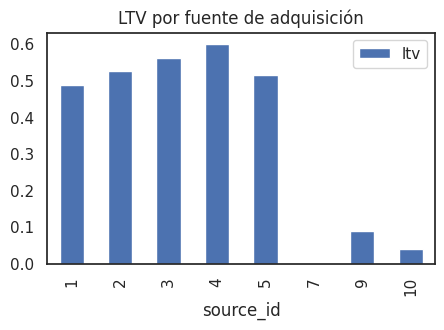

In [ ]:
ord_source = pd.merge(orders_df[['uid','order_month','revenue']], first_order_date, on='uid').merge(first_login_month[['uid','source_id']], on='uid')
ord_cohort = ord_source.groupby(['first_order_month','order_month','source_id']).agg({'revenue':'sum'}).reset_index()
source_ords = pd.merge(ord_sizes, ord_cohort, on='first_order_month')
source_ords['age'] = source_ords['order_month'] - source_ords['first_order_month']
source_ords['age'] = (source_ords['age'] /np.timedelta64(1,'M')).round().astype(int)
#Calculamos el beneficio por cohorte (LTV)
source_ords['ltv'] = source_ords['revenue'] / source_ords['new_buyers'] 
source_ords = source_ords.groupby('source_id')['ltv'].mean().reset_index()
source_ords.plot(kind='bar', x='source_id', title='LTV por fuente de adquisición', figsize=(5,3))
plt.show()

La gráfica anterior nos muestra el LTV promedio con relación a la fuente de adquisición. Queda claro que hay problemas con el canal 7. Las fuentes 9 y 10 tampoco están dando muy buenos resultados. Analizar la estrategia de marketing en dichos canales debería darnos respuestas respecto al comportamiento de los usuarios y determinar si es pertinente conservar la inversión en ellos o no.

# Marketing

##  ¿Cuánto dinero se gastó? (Total/por fuente de adquisición/a lo largo del tiempo)

In [ ]:
costs['day'] = costs['dt'].astype('datetime64[D]')
costs['week'] = costs['dt'].astype('datetime64[W]')
costs['month'] = costs['dt'].astype('datetime64[M]')

In [ ]:
costs.head()

,source_id,dt,costs,day,week,month
0,1,2017-06-01,75.20,2017-06-01,2017-06-01,2017-06-01
1,1,2017-06-02,62.25,2017-06-02,2017-06-01,2017-06-01
2,1,2017-06-03,36.53,2017-06-03,2017-06-01,2017-06-01
3,1,2017-06-04,55.00,2017-06-04,2017-06-01,2017-06-01
4,1,2017-06-05,57.08,2017-06-05,2017-06-01,2017-06-01


In [ ]:
monthly_costs = costs.groupby(['month','source_id']).sum()
print(monthly_costs)

                        costs
month      source_id         
2017-06-01 1          1125.61
           2          2427.38
           3          7731.65
           4          3514.80
           5          2616.12
...                       ...
2018-05-01 3          9411.42
           4          4214.21
           5          3669.56
           9           362.17
           10          409.86

[84 rows x 1 columns]


In [ ]:
first_visits = visits_df.groupby(['uid','source_id'])['session_month'].min().reset_index()
first_visits.rename(columns={'session_month':'first_visit'}, inplace=True)
print(first_visits.head())
first_orders = orders_df.groupby(['uid','revenue'])['order_month'].min().reset_index()
first_orders.rename(columns={'order_month':'month'}, inplace=True)
print(first_orders.head())

               uid  source_id first_visit
0   11863502262781          3  2018-03-01
1   49537067089222          2  2018-02-01
2  297729379853735          3  2017-06-01
3  313578113262317          2  2017-09-01
4  325320750514679          5  2017-09-01
                uid  revenue      month
0   313578113262317     0.55 2018-01-01
1  1575281904278712     1.22 2017-06-01
2  1575281904278712     1.83 2017-06-01
3  2429014661409475    73.33 2017-10-01
4  2464366381792757     2.44 2018-01-01


In [ ]:
visit_ord = pd.merge(first_orders, first_visits[['uid','source_id']], on='uid')

print(visit_ord.head())

                uid  revenue      month  source_id
0   313578113262317     0.55 2018-01-01          2
1  1575281904278712     1.22 2017-06-01         10
2  1575281904278712     1.83 2017-06-01         10
3  2429014661409475    73.33 2017-10-01          3
4  2464366381792757     2.44 2018-01-01          5


In [ ]:
new_users = visit_ord.groupby(['source_id', 'month'])['uid'].nunique().reset_index()
new_users.rename(columns={'uid':'new_users'}, inplace=True)
print(new_users)

    source_id      month  new_users
0           1 2017-06-01        401
1           1 2017-07-01        434
2           1 2017-08-01        337
3           1 2017-09-01        609
4           1 2017-10-01        967
..        ...        ...        ...
81         10 2018-01-01        142
82         10 2018-02-01        206
83         10 2018-03-01        282
84         10 2018-04-01        170
85         10 2018-05-01        199

[86 rows x 3 columns]


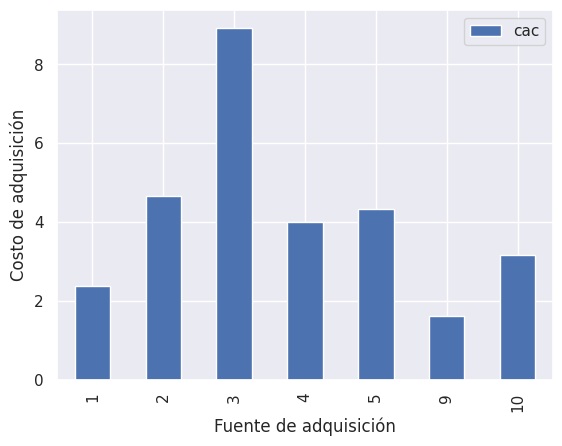

In [ ]:
costs_cac = pd.merge(monthly_costs, new_users, on=['month','source_id'])
costs_cac['cac'] = costs_cac['costs'] / costs_cac['new_users']
costs_plot = costs_cac.groupby('source_id')['cac'].mean().reset_index()
costs_plot.plot(kind='bar', x='source_id', y='cac', xlabel='Fuente de adquisición', ylabel='Costo de adquisición')
plt.show()

La gráfica nos muestra en qué fuentes de adquisición existe una inversión más fuerte. Parece que la fuente 3 supera por mucho el costo de adquisición respecto a los demas canales. Recordando nuestra gráfica de LTV podemos observar que es la fuente 4 la que tiene el LTV más alto, misma que tiene un CAC menor a la mitad del CAC de la fuente 3. Esto indica que la fuente 3 tiene un problema de rentabilidad.

In [ ]:
source_ords.rename(columns={'order_month':'month'}, inplace=True)
costs_romi = pd.merge(source_ords, costs_cac, on=['source_id', 'month'])
costs_romi['romi'] = costs_romi['ltv'] / costs_romi['cac']
costs_romi['first_order_month'] = costs_romi['first_order_month'].dt.strftime('%Y-%m')
romi_pivot = costs_romi.pivot_table(index='first_order_month', columns='age', values='romi', aggfunc='mean').cumsum(axis=1).round(2)


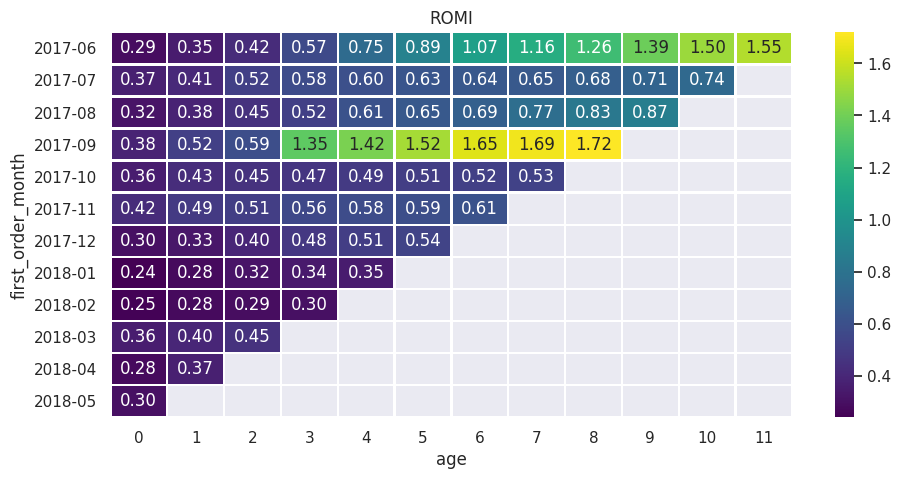

In [ ]:
sns.set(style='darkgrid')
plt.figure(figsize=(11, 5))
plt.title('ROMI')
sns.heatmap(
    romi_pivot, annot=True, fmt='.2f', linewidths=1, linecolor='white', cmap='viridis'
)
plt.show()

In [ ]:
romi_cohorts = costs_romi.pivot_table(index='first_order_month', columns='age', values='romi', aggfunc='mean')
print(romi_cohorts.cumsum(axis=1).mean(axis=0))

age
0     0.321570
1     0.385620
2     0.440946
3     0.574593
4     0.663833
5     0.761802
6     0.862145
7     0.960095
8     1.123869
9     0.988637
10    1.115627
11    1.553241
dtype: float64


La gráfica y el cálculo nos muestran que a cada cohorte le toma entre 8 y 11 meses volverse rentables. Si bien existe rentabilidad, el ROMI podría no estar alineado con las expectativas de la empresa. Analizar cuáles son las metas de la empresa en el corto y largo y plazo nos daría una mejor idea de qué tanto vamos por buen camino.

In [ ]:
print(costs_romi.groupby('source_id')[['ltv','cac','romi']].mean())


                ltv       cac      romi
source_id                              
1          0.488535  2.276608  0.215030
2          0.525975  4.442844  0.117841
3          0.563057  8.615864  0.064761
4          0.565234  3.636005  0.154158
5          0.516270  4.258356  0.120705
9          0.089557  1.661998  0.059563
10         0.039354  2.905466  0.014577


Nuestro calculo anterior nos permite confirmar que efectivamente, la fuente de adquisición 3 tiene un ROMI bajo y un CAC muy alto, por lo que se debería contemplar la posibilidad de invertir mucho menos en dicho canal. También podemos observar un ROMI muy sólido del canal 1 y un ROMI estable para los canales 2, 4 y 5. En el caso de los canales 9 y 10 también se encuentran en una situación similar al canal 3. Con esta información podemos deducir qué fuentes de adquisición son más confiables y a las que potencialmente debemos destinar más fondos, así com también detectar cuáles fuentes podrían considerarse en "pérdida".